<a href="https://colab.research.google.com/github/Celestia-Analytics/exoplanet-data-visualization/blob/Siddhesh/exoplanet_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument+from+pscomppars&format=csv"
df = pd.read_csv(url)

In [26]:
#check if there is any nulls in the data
display(df.isnull().sum())

,0
pl_name,0
hostname,0
discoverymethod,0
disc_year,0
disc_locale,0
disc_facility,0
disc_telescope,0
disc_instrument,0


In [27]:
df.head()

,pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument
0,K2-138 b,K2-138,Transit,2017,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array
1,K2-138 c,K2-138,Transit,2017,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array
2,K2-138 d,K2-138,Transit,2017,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array
3,K2-138 e,K2-138,Transit,2017,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array
4,K2-138 f,K2-138,Transit,2017,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array


Text(0, 0.5, 'Number of Discoveries')

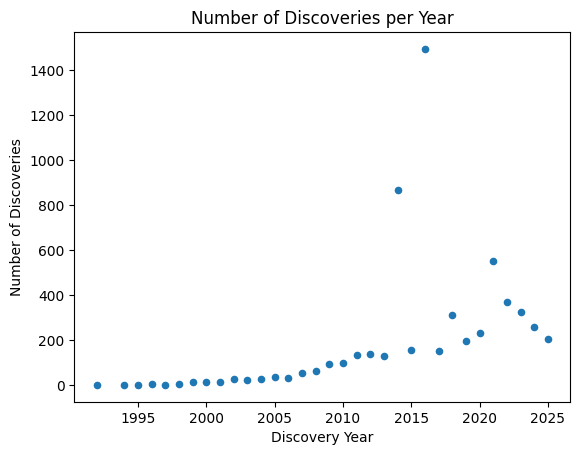

In [38]:
#Making a scatter plot for "Number of Discoveries per Year"
disc_year_counts = df['disc_year'].value_counts()

disc_year_df = disc_year_counts.reset_index()
disc_year_df.columns = ['disc_year', 'count']

disc_year_df.plot.scatter(x='disc_year', y='count', title='Number of Discoveries per Year')
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")